***#InDemandPh Artificial Intelligence 101***<br>
*Group 4  Case Study* <br>

# Virtual Case Study: AI-Assisted NCR COVID-19 Alert Level Notification System

<b>LEADER:</b>  Flores, Zander Allen S.
<br><b>PROGRAMMERS:</b>
*   Andres, Menchie M.
*   Fajardo, Ma. Jennah Benina C.

<br><b>MEMBERS:</b>
*   Badad, Dex E.
*   Pelayo, Dulce C.

<br><b>FILE LINKS:</b>

*   [**Google Drive Folder**](https://drive.google.com/drive/folders/10XpVfWH-5wrCSCHEFzFnLUpNXeLuFTWX?usp=sharing)
*   [**Canva Presentation**](https://www.canva.com/design/DAEyOJ76a74/1E7E5ebEJBosW2aR68nmHA/view?utm_content=DAEyOJ76a74&utm_campaign=designshare&utm_medium=link&utm_source=sharebutton)

## <u>1. Mount Google Drive</u>
This is used to import the dataset uploaded to Google Drive

In [ ]:
#Mount Google Drive to import dataset
from google.colab import drive
drive.mount('/content/drive')

df_path = 'drive/MyDrive/Colab Notebooks/doh-quarantine-facility-data-2021.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <u>2. Importing of Python libraries and Reading the Excel file</u>
Here, we upload the Pandas, Numpy, Matplotlib libraries, and read the excel file for the dataframe

In [ ]:
### Importing of Python libraries ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import smtplib
from email.message import EmailMessage 

#Read the excel dataset
df_doh = pd.read_excel(df_path)
df_doh

,reportdate,isolbed_o,isolbed_v,isolbed_t,beds_ward_o,beds_ward_v,beds_ward_t,facilityname,city_mun,region,province,bgy,region_psgc,province_psgc,city_mun_psgc,bgy_psgc
0,2021-12-07,0,0,0.000000,0,186,0.000000,MACARIO B ASISTIO HIGH SCHOOL ISOLATION FACILITY,CITY OF CALOOCAN,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (NOT A PROVINCE)",BARANGAY 14,PH130000000,PH137500000,PH137501000,PH137501014
1,2021-12-07,0,0,0.000000,2,30,6.250000,BAHAY KANLUNGAN ISOLATION FACILITY,CITY OF CALOOCAN,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (NOT A PROVINCE)",BARANGAY 177,PH130000000,PH137500000,PH137501000,PH137501177
2,2021-12-07,3,58,4.918033,0,0,0.000000,C4 TAÃ‘ONG ISOLATION FACILITY,CITY OF MALABON,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (NOT A PROVINCE)",TAÃ‘ONG (POB.),PH130000000,PH137500000,PH137502000,PH137502018
3,2021-12-07,0,0,0.000000,0,0,0.000000,IMELDA ELEMENTARY SCHOOL ISOLATION FACILITY,CITY OF MALABON,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (NOT A PROVINCE)",LONGOS,PH130000000,PH137500000,PH137502000,PH137502010
4,2021-12-07,0,0,0.000000,0,0,0.000000,TINAJEROS ELEMENTARY SCHOOL ISOLATION FACILITY,CITY OF MALABON,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (NOT A PROVINCE)",TINAJEROS,PH130000000,PH137500000,PH137502000,PH137502019
5,2021-12-07,0,0,0.000000,0,0,0.000000,IMELDA SENIOR HIGH SCHOOL,CITY OF MALABON,NATIONAL CAPITAL REGION (NCR),"NCR, THIRD DISTRICT (NOT A PROVINCE)",LONGOS,PH130000000,PH137500000,PH137502000,PH137502010
6,2021-12-07,0,118,0.000000,0,0,0.000000,MATAAS NA PAARALANG NEPTALI A. GONZALES,CITY OF MANDALUYONG,NATIONAL CAPITAL REGION (NCR),"NCR, SECOND DISTRICT (NOT A PROVINCE)",MAUWAY,PH130000000,PH137400000,PH137401000,PH137401017
7,2021-12-07,4,116,3.333333,0,0,0.000000,WE HEAL AS ONE CENTER-MUNTINLUPA CITY,CITY OF MUNTINLUPA,NATIONAL CAPITAL REGION (NCR),"NCR, FOURTH DISTRICT (NOT A PROVINCE)",TUNASAN,PH130000000,PH137600000,PH137603000,PH137603008
8,2021-12-07,0,15,0.000000,0,12,0.000000,OSPITAL NG MUNTINLUPA QUARANTINE FACILITY,CITY OF MUNTINLUPA,NATIONAL CAPITAL REGION (NCR),"NCR, FOURTH DISTRICT (NOT A PROVINCE)",ALABANG,PH130000000,PH137600000,PH137603000,PH137603001
9,2021-12-07,0,0,0.000000,0,0,0.000000,FILINVEST TENT COVID QUARANTINE FACILITY,CITY OF MUNTINLUPA,NATIONAL CAPITAL REGION (NCR),"NCR, FOURTH DISTRICT (NOT A PROVINCE)",ALABANG,PH130000000,PH137600000,PH137603000,PH137603001


## <u>3.0. **NCR CITIES AND MUNICIPALITIES** with the high counts in bed ward and isolated bed ward capacity</u>
In order for our notification system to work, we need to find the average percent of each city whose quarantine facilities under the following conditions of the Occupancy Rate Level.

In [ ]:
#Finding the NCR CITIES by the highest count in occupied BEDS_WARD_T
df_dohBed = pd.pivot_table(df_doh, values = ['beds_ward_t'],
                           index = ['city_mun', 'reportdate'],
                           aggfunc = np.average, fill_value=0)
df_dohBedtbl = (df_dohBed.sort_values(by = 'beds_ward_t',
                          ascending = False).round(2))

#Finding the NCR CITIES by the highest count in occupied ISOLBED_T
df_dohIsol = pd.pivot_table(df_doh, values = ['isolbed_t'],
                            index = ['city_mun', 'reportdate'],
                            aggfunc = np.average, fill_value=0)
df_dohIsoltbl = (df_dohIsol.sort_values(by = 'isolbed_t',
                                        ascending = False).round(2))

#Combining both tables
a = pd.concat((df_dohBedtbl, df_dohIsoltbl), axis=1)
print(a)

                                beds_ward_t  isolbed_t
city_mun            reportdate                        
CITY OF CALOOCAN    2021-12-07         3.12       0.00
CITY OF MALABON     2021-12-07         0.00       1.23
CITY OF MANDALUYONG 2021-12-07         0.00       0.00
CITY OF MUNTINLUPA  2021-12-07         0.00       1.11
CITY OF NAVOTAS     2021-12-07         0.00       0.00
CITY OF PARANAQUE   2021-12-07         0.00      25.00
CITY OF PASAY       2021-12-07         0.00       0.00
CITY OF PASIG       2021-12-07         0.00     100.00
CITY OF PATEROS     2021-12-07         0.00       0.00
CITY OF QUEZON      2021-12-07         0.00      28.86
CITY OF SAN JUAN    2021-12-07         0.00       0.00
CITY OF TAGUIG      2021-12-07         1.74       0.00
CITY OF VALENZUELA  2021-12-07         0.00      10.00



### <u>3.1. Finding **NCR CITIES AND MUNICIPALITIES** sorted by high counts in **BED WARD** capacity</u>

In [ ]:
#Finding the NCR CITIES by the highest count in occupied BEDS_WARD_T
df_dohBed = pd.pivot_table(df_doh, values = ['beds_ward_t'],
                           index = ['city_mun', 'reportdate'],
                           aggfunc = np.average, fill_value=0)
df_dohBedtbl = (df_dohBed.sort_values(by = 'beds_ward_t',
                          ascending = False).round(2))

#Display the NCR CITIES with max ISOLBED_T
df_dohBedtbl


,,beds_ward_t
city_mun,reportdate,
CITY OF CALOOCAN,2021-12-07,3.12
CITY OF TAGUIG,2021-12-07,1.74
CITY OF MALABON,2021-12-07,0.00
CITY OF MANDALUYONG,2021-12-07,0.00
CITY OF MUNTINLUPA,2021-12-07,0.00
CITY OF NAVOTAS,2021-12-07,0.00
CITY OF PARANAQUE,2021-12-07,0.00
CITY OF PASAY,2021-12-07,0.00
CITY OF PASIG,2021-12-07,0.00


### <u>3.2. Finding **NCR CITIES AND MUNICIPALITIES** sorted by high counts in **ISOLATION WARD** capacity</u></u>

In [ ]:
#Finding the NCR CITIES by the highest count in occupied ISOLBED_T
df_dohIsol = pd.pivot_table(df_doh, values = ['isolbed_t'],
                            index = ['city_mun', 'reportdate'],
                            aggfunc = np.average, fill_value=0)
df_dohIsoltbl = (df_dohIsol.sort_values(by = 'isolbed_t',
                                        ascending = False).round(2))

#Display the NCR CITIES with max ISOLBED_T
df_dohIsoltbl

,,isolbed_t
city_mun,reportdate,
CITY OF PASIG,2021-12-07,100.00
CITY OF QUEZON,2021-12-07,28.86
CITY OF PARANAQUE,2021-12-07,25.00
CITY OF VALENZUELA,2021-12-07,10.00
CITY OF MALABON,2021-12-07,1.23
CITY OF MUNTINLUPA,2021-12-07,1.11
CITY OF CALOOCAN,2021-12-07,0.00
CITY OF MANDALUYONG,2021-12-07,0.00
CITY OF NAVOTAS,2021-12-07,0.00


## <u>4.0. Graphing Average Percent of Overall BED OCCUPANCY from Quarantine Facility Daily Report</u>

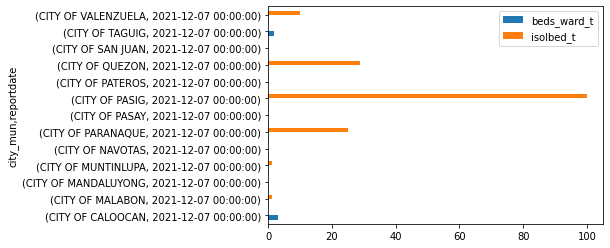

In [ ]:
a.plot(kind='barh')

### <u>4.1. Graphing Average Percent of Overall Bed Ward Occupancy

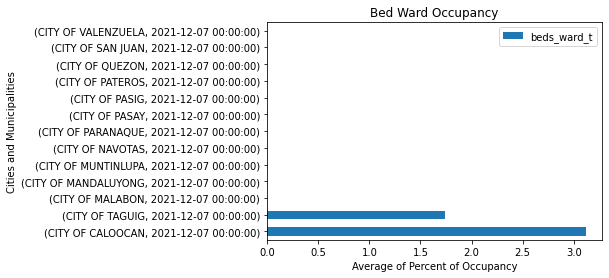

In [ ]:
#Plotting Stacked Bar Chart for Bed Ward Occupancy
df_dohB = df_dohBedtbl.head()
df_dohB = df_dohBedtbl.plot(kind='barh', stacked=True)

#Set xlabel, ylabel and title for the stacked chart
df_dohB.set_title('Bed Ward Occupancy')
df_dohB.set_xlabel('Average of Percent of Occupancy')
df_dohB.set_ylabel('Cities and Municipalities')

#Display Stacked Bar Chart for Bed Ward Occupancy
df_dohB

### <u>4.2. Graphing Average Percent of Overall Isolated Bed Ward Occupancy

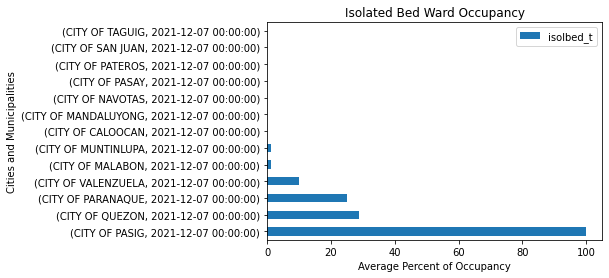

In [ ]:
#Plotting Stacked Bar Chart for Isolated Bed Ward Occupancy
df_dohI = df_dohIsoltbl.head()
df_dohI = df_dohIsoltbl.plot(kind='barh', stacked=True)

#Set xlabel, ylabel and title for the stacked chart
df_dohI.set_title('Isolated Bed Ward Occupancy')
df_dohI.set_xlabel('Average Percent of Occupancy')
df_dohI.set_ylabel('Cities and Municipalities')

#Display Stacked Bar Chart for Isolated Bed Ward Occupancy
df_dohB

### <u>5.0. Printing the summary for December 7, 2021 Daily Report</u>

#### <b>Occupancy Rate Level: All</b>
*   Less than (>) 60% ..................... SAFE
*   More than (<) 60-70% ............... MODERATE
*   70-80% ....................................... HIGH RISK
*   <= 85% ....................................... CRITICAL

#### <u>5.1. SMS Notification for December 7, 2021 Daily Report</u>

In [ ]:
#Getting the cities and municipalities (city_mun) from the date frame (df_doh)
df_dohCity = df_doh['city_mun']

#Printing text warning system for NCR Region
#Header
print('''********* SAMPLE SMS NOTIFICATION *********
\n\nDOH NCR: ''', dt_string, "\n")

################ BED OCCUPANCY RATE LEVEL FOR BED WARDS ################

#### Producing results for ISOLATION BED OCCUPANCY RATE LEVEL ####
df_dohBed1 = df_dohBed[df_dohBed['beds_ward_t']>60.00]

# Sort the values by highest average percent in beds_ward_t
df_dohBed1 = (df_dohBed.sort_values(by = 'beds_ward_t', ascending = False).round(2))

# Display df_dohIsol1 as string
print("\n_______BED WARD OCCUPANCY RATE LEVEL_______\n", str(df_dohBed1))
print("__________________________________________")
print("\n\n")

var = [ ]

for column in df_dohBed2.columns.values:
    var.append ( df_dohBed1 [ column ].tolist () )

b = np.asarray(var, dtype = np.float64, order ='C') 
        
if len(var) == 0:
  
    if (b>60) & (b <70):
        print('Alert Level is Moderate')
    if (b >= 71) & (b<85):
        print('Alert Level is High Risk')
    if b > 85:
        print('Alert Level is Critical')
else:
    print('We are safe.')
       

********* SAMPLE SMS NOTIFICATION *********


DOH NCR:  14/12/2021 01:06:54 


_______BED WARD OCCUPANCY RATE LEVEL_______
                                 beds_ward_t
city_mun            reportdate             
CITY OF CALOOCAN    2021-12-07         3.12
CITY OF TAGUIG      2021-12-07         1.74
CITY OF MALABON     2021-12-07         0.00
CITY OF MANDALUYONG 2021-12-07         0.00
CITY OF MUNTINLUPA  2021-12-07         0.00
CITY OF NAVOTAS     2021-12-07         0.00
CITY OF PARANAQUE   2021-12-07         0.00
CITY OF PASAY       2021-12-07         0.00
CITY OF PASIG       2021-12-07         0.00
CITY OF PATEROS     2021-12-07         0.00
CITY OF QUEZON      2021-12-07         0.00
CITY OF SAN JUAN    2021-12-07         0.00
CITY OF VALENZUELA  2021-12-07         0.00
__________________________________________



We are safe.


#### <u>5.2. SMS Notification for December 7, 2021 Daily Report</u>

In [ ]:
#Printing the current date (dd/mm/YY H:M:S)
dateNow = datetime.now()
dt_string = dateNow.strftime("%d/%m/%Y %H:%M:%S")

#Getting the cities and municipalities (city_mun) from the date frame (df_doh)
df_dohCity = df_doh['city_mun']

#Printing text warning system for NCR Region
#Header
print('''********* SAMPLE SMS NOTIFICATION *********
\n\nDOH NCR: ''', dt_string, "\n")

################ BED OCCUPANCY RATE LEVEL FOR ISOLATION BEDS ################

#### Producing results for ISOLATION BED OCCUPANCY RATE LEVEL ####
df_dohIsol1 = df_dohIsol[df_dohIsol['isolbed_t']>60.00]

# Sort the values by highest average percent in isolbed_t
df_dohIsol1 = (df_dohIsol1.sort_values(by = 'isolbed_t', ascending = False).round(2))

a = str(df_dohIsol1)

# Display df_dohIsol1 as string
print("\n_______BED WARD OCCUPANCY RATE LEVEL_______\n", str(a))
print("__________________________________________")
print("\n\n")

var = [ ]
for column in df_dohIsol1.columns.values:
    var.append ( df_dohIsol1 [ column ].tolist () )
    
ib = np.asarray(var, dtype = np.float64, 
                        order ='C')

if (ib>60) & (ib <70):
    print('Alert Level is Moderate')
if (ib >= 71) & (ib<85):
    print('Alert Level is High Risk')
if ib > 85:
    print('Alert Level is Critical.')
else: 
    print('We are safe')

********* SAMPLE SMS NOTIFICATION *********


DOH NCR:  14/12/2021 01:07:31 


_______BED WARD OCCUPANCY RATE LEVEL_______
                           isolbed_t
city_mun      reportdate           
CITY OF PASIG 2021-12-07      100.0
__________________________________________



Alert Level is Critical.


#### <u>5.3. Email Notification for December 7, 2021 Daily Report</u>

In [ ]:
#Printing the current date (dd/mm/YY H:M:S)
dateNow = datetime.now()
dt_string = dateNow.strftime("%d/%m/%Y %H:%M:%S")

#Getting the cities and municipalities (city_mun) from the date frame (df_doh)
df_dohCity = df_doh['city_mun']

#Printing text warning system for NCR Region
#Header
print('''***** SAMPLE EMAIL NOTIFICATION*****
DOH NCR: ''', dt_string)

################ BED OCCUPANCY RATE LEVEL FOR ISOLATION BEDS ################

#### Producing results for ISOLATION BED OCCUPANCY RATE LEVEL: SAFE ####
df_dohIsol1 = df_dohIsol[df_dohIsol['isolbed_t']>60.00]

# Sort the values by highest average percent in isolbed_t
df_dohIsol1 = (df_dohIsol1.sort_values(by = 'isolbed_t', ascending = False).round(2))

a = str(df_dohIsol1)

# Display a as string
print("_____ISOLATION BED OCCUPANCY RATE_______\n\n",a )
print("\n\n")

var = [ ]
for column in df_dohIsol1.columns.values:
    var.append ( df_dohIsol1 [ column ].tolist () )
    
ib = np.asarray(var, dtype = np.float64, 
                        order ='C')

if (ib>60) & (ib <70):
    print('Alert Level is Moderate')
    alert = 'Alert Level is Moderate'
if (ib >= 71) & (ib<85):
    print('Alert Level is High Risk')
if ib > 85:
    print('Alert Level is Critical')
    alert = 'Alert Level is Critical'
else: 
    print('We are safe')
    
#Sending of Email function
def email_alert(subject, body, to):
    msg = EmailMessage()
    msg.set_content(body)
    msg['Subject'] = subject
    msg['to'] = to
    
    user = 'chiemen19@gmail.com'
    msg['from'] = user
    password = 'pnxljcomzhukwytz'
    
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(user,password)
    server.send_message(msg)
    server.quit()
    
if __name__ == '__main__':
    email_alert('AI-Assisted Regional COVID-19 Alert Level Notification System', 
               alert, 'chiemen19@gmail.com')

***** SAMPLE EMAIL NOTIFICATION*****
DOH NCR:  14/12/2021 01:07:31
_____ISOLATION BED OCCUPANCY RATE_______

                           isolbed_t
city_mun      reportdate           
CITY OF PASIG 2021-12-07      100.0



Alert Level is Critical
